In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('./data/computed/training_data.csv')
df = df.drop('Unnamed: 0', axis=1)
columns = np.array(df.columns)
columns[25:42]

array(['Pos_C', 'Pos_C-PF', 'Pos_C-SF', 'Pos_F', 'Pos_G-F', 'Pos_PF',
       'Pos_PF-C', 'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SG', 'Pos_SF',
       'Pos_SF-PF', 'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PF', 'Pos_SG-PG',
       'Pos_SG-SF'], dtype=object)

In [3]:
# So, we make a modified feature set
features = np.setdiff1d(columns,columns[25:42])

# We also remove some categorical variables that won't be useful, such as the player's name
features = np.setdiff1d(features,['Player','player_year', 'Tm', 'Signed'])

In [4]:
df['FT%'] = df['FT%'].fillna(0)

features = np.setdiff1d(features,['Player','player_year', 'Tm', 'Signed'])
selected = df[features]
X = selected.drop('Dollars_Per_year', axis=1)
y = selected['Dollars_Per_year']

In [51]:
#Create Splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [63]:
#Put into XFBoost matrices
xgtrain = xgb.DMatrix(X_train, y_train)
xgtest = xgb.DMatrix(X_test)
y_train.head()

729     2556250.0
746     1533750.0
65       798328.0
2      19700000.0
375           0.0
Name: Dollars_Per_year, dtype: float64

In [116]:
#Param docs can be found https://xgboost.readthedocs.io/en/latest//parameter.html#learning-task-parameters
param = {'objective':'reg:linear'}
# Some randos params: https://www.kaggle.com/fashionlee/using-xgboost-for-regression
our_params={'eta':0.3,'seed':1,'subsample':0.7,'colsample_bytree':0.9
            ,'objective':'reg:linear','max_depth':2,'min_child_weight':1}
bst = xgb.train(our_params, xgtrain)
y_hat = bst.predict(xgtest)
y_test.head()

463    5800000.0
28     4500000.0
360          0.0
14     5048560.5
287    6322320.0
Name: Dollars_Per_year, dtype: float64

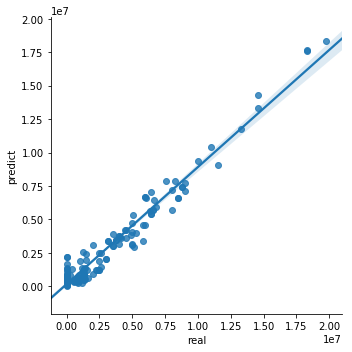

In [113]:
import seaborn as sns
results = pd.DataFrame({'real':y_test.values, 'predict':y_hat})
sns.lmplot(x='real', y='predict', data=results)

In [114]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test.values, y_hat))
rmse

858589.616167901